# Winning arguments and malleable opinions on /r/ChangeMyView

*I have the honor of featuring another guest post on my blog. This time, we have with us my friend [Chenhao Tan](https://chenhaot.com). We recently collaborated on [an effort to understand how people change their minds](https://chenhaot.com/pages/changemyview.html) on the [`/r/ChangeMyView`](http://reddit.com/r/changemyview) subreddit.

One of the many reasons why people are beautiful and fascinating is the way we change.  I get reminded of how much I have changed everytime I see a photo of myself from high school, and this always triggers memories of how my opinions and attitudes have changed over the years. Some of the beliefs I held most strongly ended up being abandonded completely, while others have not changed much. <span style='color: red'>*If you're bored already, scroll down, this blog post has code too!*</span>
    
Attitude change and persuasion has been an appealing research topic for a long time.  One of the more interesting theories on this issue is [*the backfire effect*](http://youarenotsosmart.com/2011/06/10/the-backfire-effect/):

> When your deepest convictions are challenged by contradictory evidence, your beliefs get stronger.

Earlier studies, however, suggest a lot more nuance. For instance, individuals who [*affirm their self*](https://en.wikipedia.org/wiki/Self-affirmation) were [found](https://ed.stanford.edu/sites/default/files/when_beliefs_yield.pdf) to be more likely to be persuaded by evidence.  Studying opinion change *in the wild* can be difficult.  Many times, people change their mind slowly and subtly, over a number of years, making it difficult to pinpoint the exact moment or cause of the change.  Also, a change of opinion on a minor, inconsequential topic may not be worth discussing.

We contributed to the efforts by studying [`/r/ChangeMyView`](http://reddit.com/r/changemyview) (CMV), an online forum of civil, open-minded discussion where people invite other members to challenge their more controversial views.  If you've never visited CMV, the concept that people can debate hot topics without getting into flame wars on the internet might be hard to believe.  Or, if you read a lot of Youtube comments, you might be inclined to believe *the backfire effect*, and doubt that graceful concession is even possible online.  But a quick trip to this great subreddit will undoubtably make you a believer.

## What makes `/r/ChangeMyView` special?

Some of the more interesting reasons why CMV is a cool lens for the study of persuasion is:

 * Original posters (OP) select views that are important to them and controversial, but, by posting them there, manifest a *de facto* openness to counterarguments.
 
 * For an OP's opinion, there are usually multiple, high-quality persuasion attempts, but most are unsuccessful. By comparing challenges to the same person's opinion, we avoid the *trap* of actually finding that some issues are easier to challenge than others.
 
 * Successful arguments are explicitly marked with a delta (Δ). *Hooray for supervised learning!*
 
 * Even in light of CMV users being open-minded, *not all opinions are changed*, and not just due to a lack of trying. This gives us a chance to analyze *resistance to persuasion*.




## Taking a look at the dataset

I know what you're thinking, a little less conversation, let's actually look at some examples.  Sure, our pleasure! Let's download the dataset that we compiled.

**Warning:** If you're following along at home, and you don't already have it, this will download the 321M file `cmv.tar.bz2`.  We kept the code simple, but the downside is that your Jupyter kernel will be busy until the file is downloaded.  If, by any chance, your connection drops or you interrupt it, you will have to remove the partial file, otherwise the rest of the notebook might not work.

In [1]:
# load the data
import tarfile
import os.path
import json
import re
from bz2 import BZ2File
from urllib import request
from io import BytesIO

import numpy as np


fname = "cmv.tar.bz2"
url = "https://chenhaot.com/data/cmv/" + fname
op_fname = "op_task/train_op_data.jsonlist.bz2"

# download if not exists
if not os.path.isfile(fname):
    f = BytesIO()
    with request.urlopen(url) as resp, open(fname, 'wb') as f_disk:
        data = resp.read()
        f_disk.write(data)  # save to disk too
        f.write(data)
        f.seek(0)
else:
    f = open(fname, 'rb')


tar = tarfile.open(fileobj=f, mode="r")

# Extract the file we are interested in
train_bzlist = tar.extractfile(op_fname)

# Deserialize the JSON list
original_posts = [
    json.loads(line.decode('utf-8'))
    for line in BZ2File(train_bzlist)
]

f.close()

In this blog post, we are going to focus on the original posts, rather than the arguments made in response to them.  In the final part of our paper, we explored *resistance to persuasion*: recognizing whether an OP is likely to be persuaded or not, given how they express their view.  We insist on this because we think it's interesting and we know there's plenty more work to be done on this task: we merely scratched the surface! So, hopefully, this quick tour will make you want to work on this.

In [2]:
from IPython.display import Markdown


def show_post(cmv_post):
    md_format = "**{title}** \n\n {selftext}".format(**cmv_post)
    md_format = "\n".join(["> " + line for line in md_format.splitlines()])
    return Markdown(md_format)

In [3]:
show_post(original_posts[200])

> **CMV: Taxation should be voluntary, with individuals retaining the right to opt out of it.** 
> 
>  Let me preface this argument by saying that I don't particularly agree with the Tea Party. I'm a Democrat who votes for candidates that support ending the poverty trap, expanding social services, and wish to improve fundamental institutions like education or military service. With that said, I also believe in the concept of personal liberty. This includes the right to refuse taxation upon the basis of... well, whatever the fuck you want.
> 
> I know what your thinking, "But how could we fund things like food stamps if shitty people are like 'fuck those lazy blacks that suck up muh moneyz'?" However, in order to participate in the American system of democracy, one must agree to pay taxes unconditionally. A citizen ought not be able to decide which services he or she pays for. Instead, one can only receive protection from, say, the police if they pay every tax mandated by the local, state, or federal government.
> In my opinion, this would create a voluntary political system where individual rights are maintained. If we believe that the government overwhelmingly improves our own conditions, as I do, then only a small amount of citizens would opt out of public services because they disagree with certain elements of policy. Within the framework of government existing because it benefits the people, no one should expect a sudden drop in tax revenues because citizens are intelligent enough to understand how their own interests are promoted by the state on balance.
> 
> So go forth and CMV, noble redditors!
> _____
> 
> &gt; *Hello, users of CMV! This is a footnote from your moderators. We'd just like to remind you of a couple of things. Firstly, please remember to* ***[read through our rules](http://www.reddit.com/r/changemyview/wiki/rules)***. *If you see a comment that has broken one, it is more effective to report it than downvote it. Speaking of which,* ***[downvotes don't change views](http://www.reddit.com/r/changemyview/wiki/guidelines#wiki_upvoting.2Fdownvoting)****! If you are thinking about submitting a CMV yourself, please have a look through our* ***[popular topics wiki](http://www.reddit.com/r/changemyview/wiki/populartopics)*** *first. Any questions or concerns? Feel free to* ***[message us](http://www.reddit.com/message/compose?to=/r/changemyview)***. *Happy CMVing!*

What do you think, has this OP's view been changed?

*... drumroll ...*

In [4]:
original_posts[200]["delta_label"]

False

This poster has not been successfully persuaded! And just in case you have any doubts that no attempts were made or something, (we checked, trust us), we could go take a look at all comments and discussion by following the `post_id` to the original post on Reddit:

In [5]:
_, post_id = original_posts[200]['name'].split("_")
print("http://reddit.com/r/changemyview/comments/{}".format(post_id))

http://reddit.com/r/changemyview/comments/2q03zk


Just by reading the post, it's obvious that some cleanup needs to be done: we should strip the moderator-added footnotes, edits and quotes. We will do this by removing lines starting with ">", lines starting with "\_\_\_\_", and lines where the string "edit" occurs in the first 2 "words". *(In the code used for our research, we used __a more careful heuristic__ that involves actual tokenization, but we will keep it simple here and split at white spaces.)*

In [6]:
def cleanup(cmv_post):
    lines = [line for line in cmv_post.splitlines()
             if not line.lstrip().startswith("&gt;")
             and not line.lstrip().startswith("____")
             and "edit" not in " ".join(line.lower().split()[:2])
            ]
    return "\n".join(lines)

In [7]:
show_post(dict(title=original_posts[200]['title'],
               selftext=cleanup(original_posts[200]['selftext'])))

> **CMV: Taxation should be voluntary, with individuals retaining the right to opt out of it.** 
> 
>  Let me preface this argument by saying that I don't particularly agree with the Tea Party. I'm a Democrat who votes for candidates that support ending the poverty trap, expanding social services, and wish to improve fundamental institutions like education or military service. With that said, I also believe in the concept of personal liberty. This includes the right to refuse taxation upon the basis of... well, whatever the fuck you want.
> 
> I know what your thinking, "But how could we fund things like food stamps if shitty people are like 'fuck those lazy blacks that suck up muh moneyz'?" However, in order to participate in the American system of democracy, one must agree to pay taxes unconditionally. A citizen ought not be able to decide which services he or she pays for. Instead, one can only receive protection from, say, the police if they pay every tax mandated by the local, state, or federal government.
> In my opinion, this would create a voluntary political system where individual rights are maintained. If we believe that the government overwhelmingly improves our own conditions, as I do, then only a small amount of citizens would opt out of public services because they disagree with certain elements of policy. Within the framework of government existing because it benefits the people, no one should expect a sudden drop in tax revenues because citizens are intelligent enough to understand how their own interests are promoted by the state on balance.
> 
> So go forth and CMV, noble redditors!

Now that the cleanup is done, we can think a bit about what, and how, the OP is trying to express here.  We can see several strategies at play:

 * Prefacing with a cop-out attempting to make their opinion seem more reasonable. 
 * Liberal (pun intended) use of casual language, slang, curse words.
 * Lots of self-asserting: "I know, "I believe", "I'm a Democrat", etc.

There is plenty of room for speculation, exploration, finding patterns, and connecting this to existing literature.  Let's focus on one of our results:


## Reproducing some results

One of our findings was that OPs who express their view using "we" are more stubborn than the ones who say "I". The example above uses some plural pronouns ("If we believe") but overall it seems the opinion is purely self-attributed.  Does this pattern hold in the dataset?

In [8]:
pron_i = ['ive',
 "i'd",
 "i'm",
 'myself',
 'mine',
 'me',
 'im',
 "i'll",
 'i',
 "i've",
 'id',
 'my']

In [9]:
pron_we = ["we'd",
 "we're",
 'lets',
 'weve',
 'we',
 'our',
 'ourselves',
 "let's",
 'ours',
 'us',
 "we'll",
 "we've"]

In [10]:
pron_we_re = re.compile("\\b({})\\b".format("|".join(pron_we)), re.IGNORECASE)
pron_i_re = re.compile("\\b({})\\b".format("|".join(pron_i)), re.IGNORECASE)

In [11]:
pron_we_re.findall("Weve let ourselves go")

['Weve', 'ourselves']

In [12]:
n_we = []
n_i = []
for post in original_posts:
    content = post["selftext"].lower()
    content = cleanup(content)
    denom = len(content.split())
    if denom:
        n_we.append(len(pron_we_re.findall(content)) / denom)
        n_i.append(len(pron_i_re.findall(content)) / denom)
    else:
        # there is one instance that consists only of edits.
        # It's possible that the OP deleted the rest of the post.
        n_we.append(0)
        n_i.append(0)

In [13]:
n_we = np.array(n_we)
n_i = np.array(n_i)

is_malleable = np.array([post["delta_label"] for post in original_posts])

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
_, green, red, _, _, _ = sns.color_palette()

In [16]:
from scipy.stats import sem

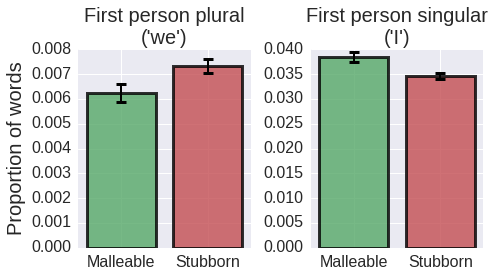

In [17]:
def compare_bars(feature, y):
    pos = feature[y]
    neg = feature[~y]
    plt.bar(
        [1, 2],
        [pos.mean(), neg.mean()],
        yerr=[1.96 * sem(pos), 1.96 * sem(neg)],  # ~95% ci
        align='center',
        color=[green, red],
        alpha=0.8,
        lw=3,
        error_kw=dict(ecolor='k', lw=2, capsize=5, capthick=3)
    )
    plt.xticks((1, 2), ["Malleable", "Stubborn"], fontsize=16)
    plt.yticks(fontsize=16)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plt.title("First person plural\n('we')", fontsize=20)
compare_bars(n_we, is_malleable)
plt.ylabel("Proportion of words", fontsize=20)

plt.subplot(122)
plt.title("First person singular\n('I')", fontsize=20)
compare_bars(n_i, is_malleable)

plt.tight_layout()

## Training a simple classifier

We can take this one step further and train a simple bag-of-words classifier using [`scikit-learn`](http://scikit-learn.org/).  Bag-of-words is often a good baseline, and a good *debugging* tool: sometimes, problems are simpler than we think, and bag-of-words can catch this and hint that we're being too optimistic.  (For an example of what I mean, try running the code below without the "cleanup" step.)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics.scorer import roc_auc_scorer

In [19]:
# prepare the data in Python list form

op_text = [
    cleanup(original_post['selftext'])
    # original_post['selftext']  # try this at home
    for original_post
    in original_posts
]

In [20]:
# Leave out a 10% test set
splitted = train_test_split(op_text,
                            is_malleable,
                            test_size=0.1,
                            stratify=is_malleable,
                            random_state=0)
text_train, text_test, y_train, y_test = splitted

We will use a simple term-frequency vectorizer with no IDF and no data-dependent thresholds. This allows us to vectorize all of the training data once, and then do efficient model selection using LogisticRegressionCV, without having to vectorize again for each cross-validation fold.

*Side note: *This is important!  Imagine we wanted to throw away rare words, to avoid overfitting to them. We could use, for example, `min_df=10`.  This would keep all words that appear 10 times in the *training data*.  But, in a moment, we will be doing 3-fold cross-validation.  Consider the first cross-validation split: what if we encounter a word that occurs 5 times in the train fold and 5 times in the validation fold?  If we vectorized *outside* of the CV loop, we would keep this word, and assign it a weight estimated from very few observations.  This could lead us to overestimate our validation performance.

In [21]:
vect = TfidfVectorizer(use_idf=False, norm='l1')
X_train = vect.fit_transform(text_train)
X_test = vect.transform(text_test)

In [22]:
lr = LogisticRegressionCV(Cs=10, class_weight='balanced',
                          scoring='roc_auc', solver='sag',
                          tol=0.001, max_iter=500,
                          random_state=0)

In [23]:
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=500,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
           refit=True, scoring='roc_auc', solver='sag', tol=0.001,
           verbose=0)

In [24]:
test_roc = roc_auc_scorer(lr, X_test, y_test)
print("Test ROC AUC score: {:.3f}".format(test_roc))

Test ROC AUC score: 0.537


The score is in the same ballpark as the results in our paper.  (Though here we are using a different train-test split, so we could expect some differences.)


## Checking out the features

We can use the trained model to see what words have high and low weights. You could use the output for further inspiration.  For instance, this could suggest that generalizing words ("anything", "anyone", "nothing") might be a sign of stubbornness.  There is plenty of potential for exploring and expanding our work further, so give it a try!

In [25]:
def top_features(coef, words, n=15):
    order = np.argsort(-coef)
    for i_hi, i_lo in zip(order[:n], order[:-n - 1:-1]):
        row_vals = coef[i_hi], words[i_hi], coef[i_lo], words[i_lo]
        print("({:>6.1f}) {:<20}({:>6.1f}) {:<20}".format(*row_vals))

In [26]:
top_features(lr.coef_.flatten(), vect.get_feature_names())

(  20.0) subject             ( -20.3) anything            
(  19.3) philosophy          ( -18.9) minimum             
(  18.5) even                ( -18.1) its                 
(  18.3) doesn               ( -18.0) population          
(  17.6) hard                ( -17.8) course              
(  17.2) nice                ( -17.7) justice             
(  17.1) ll                  ( -15.7) intelligence        
(  17.1) wanted              ( -15.6) nothing             
(  16.3) extremely           ( -15.6) having              
(  15.2) election            ( -15.5) best                
(  15.0) chance              ( -15.0) anyone              
(  14.9) likely              ( -14.9) born                
(  14.8) so                  ( -14.9) popular             
(  14.7) planets             ( -14.7) economic            
(  14.3) sports              ( -14.6) immoral             


Much of the social interaction we do online these days can prove useful for research.  In our work, we investigated persuasion and attitude change on `/r/ChangeMyView`.  In this post, we walked through part of the data that we collected and made available.  Hoping that this sparks some inspiration, we are looking forward to hearing what cool new things you will discover!

-----

In [27]:
%load_ext watermark

In [28]:
%watermark -d -v --packages numpy,scipy,scikit-learn,seaborn -m

2016-03-01 

CPython 3.4.4
IPython 4.1.1

numpy 1.10.2
scipy 0.16.1
scikit-learn 0.17
seaborn 0.7.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 3.19.0-25-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
